In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from ReferenceElement import *
from dg_nonlinear_coord_trans import *

In [2]:
x_p0 = np.pi
xi_p =np.pi

def x_p(t):
    return x_p0 + np.sin(0.3*t)
def x_p_dot(t):
    return  0.3*np.cos(0.3*t)
def xi_to_x(xi,a,b,t,x_p, xi_p,x_p0):
    x = a + (x_p(t)-a)/(xi_p-a)*(xi-a) + ((b-x_p(t))*(xi_p-a)-(x_p(t)-a)*(b-xi_p))/((xi_p-a)*(b-xi_p)*(b-a))*(xi-a)*(xi-xi_p)    
    return x

In [3]:
start = -2*np.pi
end = 2*np.pi
N = 8
K = 8
CF = 2.**(-7)

h = (end-start)/K
reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h
xi_int = get_x_elements(start,end,K, reference_interval)
dx_min = get_dx_min(xi_int)
dt = CF*dx_min
print(dt)
for i in range(len(xi_int)):
        if np.round(xi_int[i][-1],6) == np.round(xi_p,6):
            k_p = i
            break
print(k_p)

0.000615077236711857
5


In [4]:
# for i in range(len(xi_int)):
#     plt.plot(xi_int[i],np.ones_like(xi_int[i]), marker = 'o')
#     plt.plot(x_int[i],np.zeros_like(x_int[i]), marker = 'o', label = 'x')
# plt.ylim(-1,10)
# plt.legend()
# plt.title('t = '+ str(np.round(t,3)))

In [5]:
def u_initial(x,t):
    return np.sin(x-t)+1/2*np.sin(x+t)
def du_dt_initial(x,t):
    return -np.cos(x-t)+1/2*np.cos(x+t)
def q_initial(x,t):
    return np.cos(x-t)+1/2*np.cos(x+t)
def p_initial(x,t,beta_initial):
    return beta_initial*q_initial(x,t) - du_dt_initial(x,t)
def j1(beta, dx_dxi, t):
#     return 0
    return -beta*np.sin(t)+1/dx_dxi**2*2*np.sin(t)
def j2(beta, dx_dxi,t):
    return -beta*2*np.sin(t)+np.sin(t)
#     return 0
def potential_term(x, x_center, stdev):
    return 1/np.sqrt(2*np.pi*stdev**2)*np.exp(-(x-x_center)**2/(2*stdev**2))

In [6]:
t = 0
x_int = xi_to_x(xi_int,start,end,t,x_p,xi_p,x_p0)

In [7]:
t = 0.
t_target = 10.
nt = int((t_target - t)/dt)
print(nt)
beta_initial = func_beta(start,end,t,xi_p,xi_int,x_p,x_p_dot)
# u = u_initial(xi_int,t)
# p = p_initial(xi_int,t,beta_initial)
# q = q_initial(xi_int,t)
u = np.zeros_like(xi_int)
p = np.zeros_like(xi_int)
q = np.zeros_like(xi_int)

16258


In [8]:
# direc = "result7"
# if os.path.isdir(direc):
#     print('Directory '+direc+' already exists')
# else:
#     os.makedirs(direc)
# images = []
for i in range(nt):
    beta = func_beta(start,end,t,xi_p,xi_int,x_p,x_p_dot)
    dx_dxi = func_dx_dxi(start, end, t,xi_p,xi_int,x_p)
    d2x_dxi2 = func_d2x_dxi2(start,end,t,xi_p,x_p)
    un=u.copy()
    pn=p.copy()
    qn=q.copy()
    p= RK4_Step(dt, func_dp_dt,pn,un,qn,K,t,M_inv,M_inv_S,True,j1,j2,k_p,False,x_p,x_p_dot,beta,dx_dxi,d2x_dxi2)
    q= RK4_Step(dt, func_dq_dt,qn,un,pn,K,t,M_inv,M_inv_S,True,j1,j2,k_p,False,x_p,x_p_dot,beta,dx_dxi,d2x_dxi2) 
    u= RK4_Step(dt, func_du_dt,un,pn,qn,K,t,M_inv,M_inv_S,True,j1,j2,k_p,False,x_p,x_p_dot,beta,dx_dxi,d2x_dxi2)
    t+=dt
    
#     if i% int(nt/150) ==0:
#         x = xi_to_x(xi_int,start,end,t,x_p,xi_p,x_p0)
#         plt.figure(figsize=(11, 7), dpi=100)
#         for i in range(len(u)):
#             plt.plot(x[i],u[i])
#         plt.title('u at t = '+str(np.round(t,3)))
#         plt.xlabel('x')
#         plt.ylim(-3,3)
#         plt.axvline(x=x_p(t),ls ='--',color = 'black')
#         plt.grid()        
#         #plt.legend()
#         name = direc+"/figure"+str(np.round(t,3))+'.png'
#         plt.savefig(name)
#         images.append(imageio.imread(name))
#         plt.close()
# gifName = direc+'/movie.gif'
# imageio.mimsave(gifName,images)
print(t)   

9.99992571445978


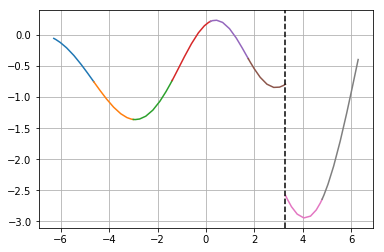

In [14]:
x = xi_to_x(xi_int,start,end,t,x_p,xi_p,x_p0)
d2x_dxi2 = func_d2x_dxi2(start,end,t,xi_p,x_p)
beta = func_beta(start,end,t,xi_p,xi_int,x_p,x_p_dot)
dx_dxi = func_dx_dxi(start, end, t,xi_p,xi_int,x_p)
#dp_dt=func_dp_dt(p,u,q,K,t,M_inv,M_inv_S,True,False,False,False,False,x_p, x_p_dot,beta,dx_dxi,d2x_dxi2)
#dq_dt=func_dq_dt(q,u,p,K,t,M_inv,M_inv_S,True,False,False,False,False,x_p, x_p_dot,beta,dx_dxi,d2x_dxi2)
ana_u = u_initial(x,t)
for i in range(len(u)):
#     plt.plot(xi_int[i],u[i])
    plt.plot(x[i],u[i])
#     plt.plot(x[i],ana_u[i])
#     plt.plot(xi_int[i],dp_dt[i])
#     plt.plot(xi_int[i],dq_dt[i],ls = '--')
# plt.ylim(-2,2)
plt.axvline(x=x_p(t),ls ='--',color = 'black')
plt.grid()

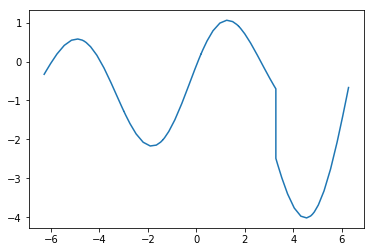

In [15]:
plt.plot(x.flatten(),(u-ana_u).flatten())

In [16]:
np.average(u)

-0.9812923757899732

In [17]:
beta

array([[-0.        , -0.00931092, -0.02961122, -0.05737752, -0.08818909,
        -0.11760586, -0.14191582, -0.15850305, -0.16579929],
       [-0.16579929, -0.17298692, -0.18855652, -0.20960893, -0.23260151,
        -0.25413801, -0.27158222, -0.28327561, -0.28836005],
       [-0.28836005, -0.29333109, -0.30396181, -0.31800429, -0.33283228,
        -0.34613924, -0.35641265, -0.36299434, -0.36576839],
       [-0.36576839, -0.36842395, -0.37389522, -0.38061409, -0.38691119,
        -0.39161842, -0.39439763, -0.3956366 , -0.39599574],
       [-0.39599574, -0.39623097, -0.3963089 , -0.39537147, -0.39274914,
        -0.3884639 , -0.38340577, -0.3790569 , -0.37689018],
       [-0.37689018, -0.37459382, -0.36903014, -0.36008325, -0.34812902,
        -0.33443427, -0.32117438, -0.31097731, -0.3061669 ],
       [-0.3061669 , -0.30122075, -0.28975173, -0.27242018, -0.25069573,
        -0.22714825, -0.20529923, -0.18897717, -0.18139778],
       [-0.18139778, -0.17367617, -0.15602138, -0.12990616, -0

In [13]:
sdaf = np.array([[1,2,3],[4,5,6],[7,8,9]])
sdaf

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [15]:
sdaf[:,-1]

array([3, 6, 9])

In [16]:
def change_element(a):
    a[0][0] = 0

In [17]:
change_element(sdaf)

In [18]:
sdaf

array([[0, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [19]:
ww = func_dx_dxi(start,end,1,xi_p,xi_int,x_p)


In [20]:
xi_to_x(xi_int,start,end,0.7,x_p,xi_p,x_p0)

array([[-6.28318531, -6.19753358, -6.00766933, -5.74048568, -5.43264343,
        -5.12594643, -4.86160067, -4.67478501, -4.59078737],
       [-4.59078737, -4.50687702, -4.32087921, -4.05915145, -3.75761715,
        -3.45722811, -3.19833825, -3.01538902, -2.93313275],
       [-2.93313275, -2.85096377, -2.6688324 , -2.41256054, -2.11733419,
        -1.8232531 , -1.56981913, -1.39073635, -1.31022145],
       [-1.31022145, -1.22979384, -1.05152891, -0.80071294, -0.51179454,
        -0.22402141,  0.02395666,  0.19917301,  0.27794653],
       [ 0.27794653,  0.35663278,  0.53103127,  0.77639134,  1.05900178,
         1.34046696,  1.58298914,  1.75433905,  1.8313712 ],
       [ 1.8313712 ,  1.90831608,  2.07884813,  2.3187523 ,  2.59505479,
         2.87021202,  3.1072783 ,  3.27476177,  3.35005255],
       [ 3.35005255,  3.42525606,  3.59192167,  3.82636995,  4.09636449,
         4.36521376,  4.59682414,  4.76044117,  4.83399059],
       [ 4.83399059,  4.90745273,  5.07025189,  5.29924428,  5

In [26]:
x

array([[-6.28318531, -6.20445542, -6.029648  , -5.78297893, -5.49778714,
        -5.21259535, -4.96592628, -4.79111887, -4.71238898],
       [-4.71238898, -4.63365909, -4.45885168, -4.21218261, -3.92699082,
        -3.64179903, -3.39512996, -3.22032254, -3.14159265],
       [-3.14159265, -3.06286277, -2.88805535, -2.64138628, -2.35619449,
        -2.0710027 , -1.82433363, -1.64952621, -1.57079633],
       [-1.57079633, -1.49206644, -1.31725902, -1.07058995, -0.78539816,
        -0.50020637, -0.2535373 , -0.07872989,  0.        ],
       [ 0.        ,  0.07872989,  0.2535373 ,  0.50020637,  0.78539816,
         1.07058995,  1.31725902,  1.49206644,  1.57079633],
       [ 1.57079633,  1.64952621,  1.82433363,  2.0710027 ,  2.35619449,
         2.64138628,  2.88805535,  3.06286277,  3.14159265],
       [ 3.14159265,  3.22032254,  3.39512996,  3.64179903,  3.92699082,
         4.21218261,  4.45885168,  4.63365909,  4.71238898],
       [ 4.71238898,  4.79111887,  4.96592628,  5.21259535,  5

In [69]:
def x_to_xi(x, a,b,t ,x_p,xi_p):
    if x_p(t) == x_p(0):
        return x
    sqrt_delta = (a**2*b**2 - 2*a**2*b*x_p(t) + a**2*x_p(t)**2 - 2*a*b**2*x_p(t) - 2*a*b*x_p(t)**2 + 8*a*b*x_p(t)*xi_p 
               + 4*x*a*b*x_p(t) - 2*a*b*xi_p**2 - 4*x*a*b*xi_p - 2*a*x_p(t)*xi_p**2 - 4*x*a*x_p(t)*xi_p + 4*x*a*xi_p**2 
               + b**2*x_p(t)**2 - 2*b*x_p(t)*xi_p**2 - 4*x*b*x_p(t)*xi_p + 4*x*b*xi_p**2 + 4*x*x_p(t)*xi_p**2 
               + xi_p**4 - 4*x*xi_p**3)**(1/2)
    minus_b= -a*b + a*x_p(t) + b*x_p(t) - xi_p**2
    a_2 = 2*(x_p(t) - xi_p)
    sol_1 = (minus_b - sqrt_delta)/a_2
    return sol_1


In [70]:
x = xi_to_x(xi_int,start,end,2*np.pi/0.3,x_p,xi_p,x_p0)
xi_=x_to_xi(x,start,end,2*np.pi/ 0.3, x_p,xi_p)

In [71]:
xi_

array([[-12.,  -8., -12.,  -4.,  -0., -16.,  -8.,  -8.,  -8.],
       [ -8.,  -0.,  -8.,  -0.,  -8.,  -4.,  -4.,  -0.,  -0.],
       [ -0.,  -0.,  -0.,   4.,  -4.,  -4.,  -8.,   4.,  -0.],
       [ -0.,  -4.,  -0.,  -0.,   4.,   4.,  -0.,  -0.,  -0.],
       [ -0.,   4.,  -0.,  -0.,  -0.,  -0.,  -0.,   4.,  -0.],
       [ -0.,  -0.,   4.,  -0.,   4.,  -0.,  12.,  -0.,   4.],
       [  4.,  12.,  12.,   4.,   4.,   4.,  -0.,  -0.,   8.],
       [  8.,   4.,   4.,   4.,  16.,   4.,   4.,  -0.,   4.]])

In [59]:
xi_-xi_int

array([[ -5.71681469,  -1.79554458,  -5.970352  ,   1.78297893,
          5.49778714, -10.78740465,  -3.03407372,  -3.20888113,
         -3.28761102],
       [ -3.28761102,   4.63365909,  -3.54114832,   4.21218261,
         -4.07300918,  -0.35820097,  -0.60487004,   3.22032254,
          3.14159265],
       [  3.14159265,   3.06286277,   2.88805535,   6.64138628,
         -1.64380551,  -1.9289973 ,  -6.17566637,   5.64952621,
          1.57079633],
       [  1.57079633,  -2.50793356,   1.31725902,   1.07058995,
          4.78539816,   4.50020637,   0.2535373 ,   0.07872989,
         -0.        ],
       [ -0.        ,   3.92127011,  -0.2535373 ,  -0.50020637,
         -0.78539816,  -1.07058995,  -1.31725902,   2.50793356,
         -1.57079633],
       [ -1.57079633,  -1.64952621,   2.17566637,  -2.0710027 ,
          1.64380551,  -2.64138628,   9.11194465,  -3.06286277,
          0.85840735],
       [  0.85840735,   8.77967746,   8.60487004,   0.35820097,
          0.07300918,  -0.2121

(-2, 4)

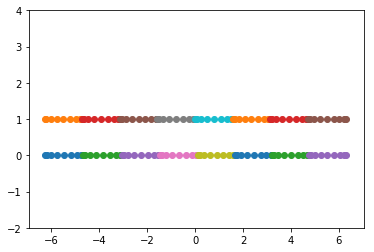

In [57]:
for i in range(len(x)):
    plt.scatter(x[i],np.zeros_like(x[i]))
    plt.scatter(xi_[i],np.ones_like(xi_[i]))
plt.ylim (-2,4)